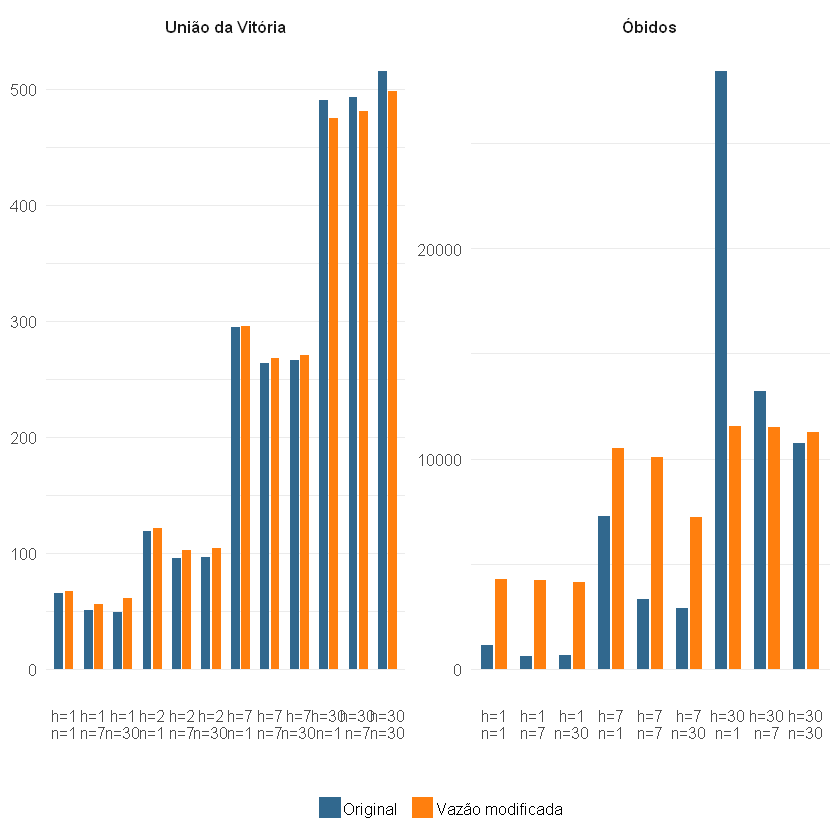

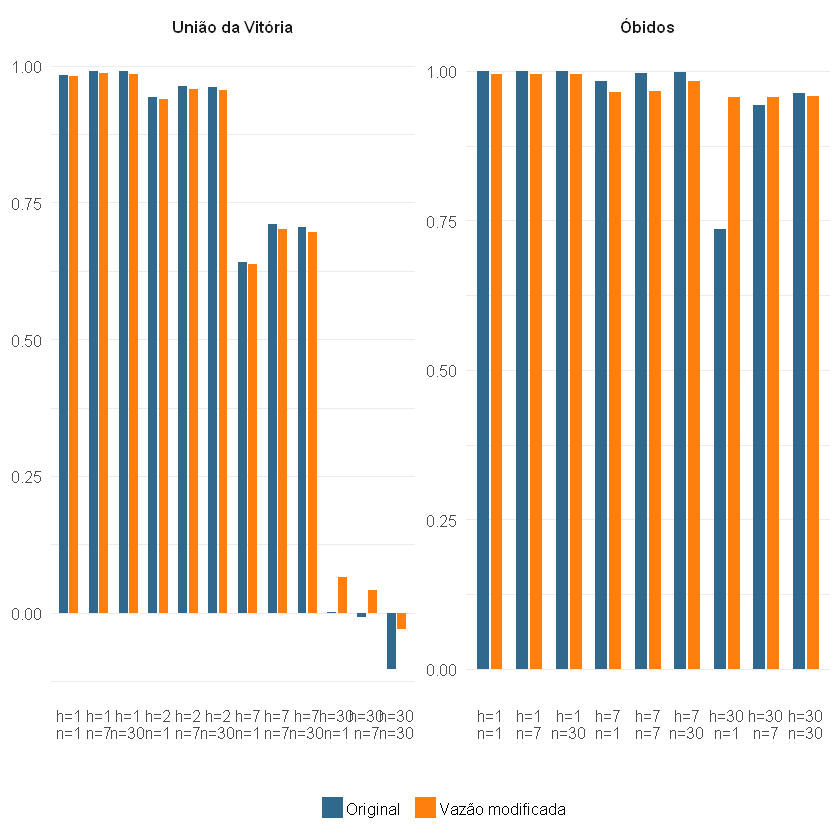

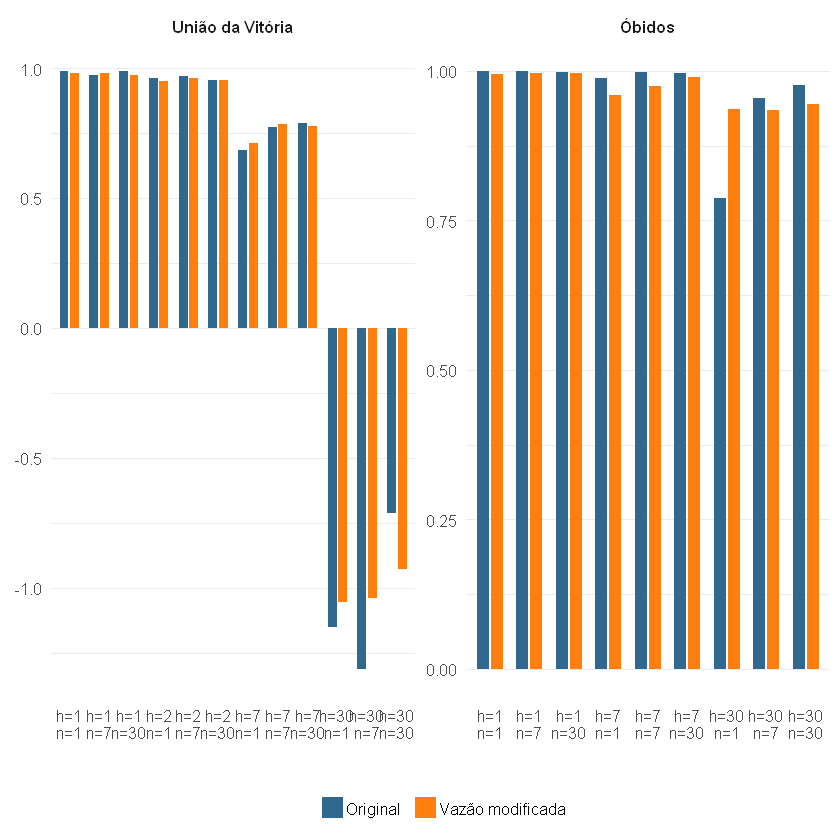

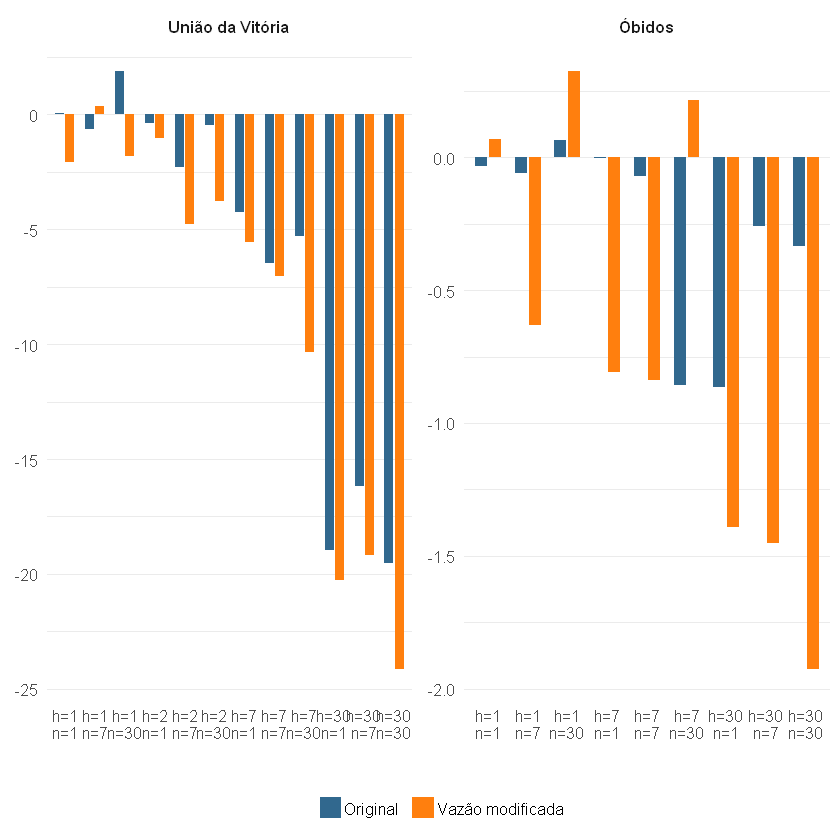

In [76]:
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)

# 1) leia seu Excel (ajuste o caminho se necessário)
df <- read_excel("apenas parametros2.xlsx")

# 2) transforme para formato "longo"
df_long <- df %>%
  pivot_longer(
    cols      = c(RMSE, NSE, KGE, Pbias),
    names_to  = "Metric",
    values_to = "Value"
  ) %>%
  # cria um rótulo único para h e n
  mutate(Label = paste0("h=", h, "\nn=", n),
        Local = factor(Local, levels = c("Uniao da vitoria", "Obidos"))
  )


#  defina a ordem dos níveis de Label: ordene por h e depois por n
label_levels <- df_long %>%
  distinct(h, n, Label) %>%
  arrange(h, n) %>%
  pull(Label)


#  aplique esses níveis ao fator Label e reordene Local também
df_long <- df_long %>%
  mutate(
    Label = factor(Label, levels = label_levels),
    Local = factor(Local, levels = c("Uniao da vitoria", "Obidos"))
  )


# 3) para cada métrica, gera um gráfico com 2 painéis (Óbidos e União da Vitória)
metrics <- unique(df_long$Metric)

for (met in metrics) {
  sub <- df_long %>%
    filter(Metric == met,
           Local %in% c("Obidos", "Uniao da vitoria"))
  
  p <- ggplot(sub, aes(x = Label, y = Value, fill = `Tipo de serie`)) +
    geom_col(position = position_dodge(width = 0.7), width = 0.6) +
    facet_wrap(~ Local, nrow = 1, scales = "free", #free_x
            labeller = labeller(
                 Local = c(
                   Obidos             = "Óbidos",
                   "Uniao da vitoria"   = "União da Vitória"
                 )
               )) +

    labs(
      title = NULL,#met,
      x     = "",          # esvazia o rótulo x, pois já há os labels
      y     = NULL,#met,
      fill  = ""
    ) +

# customiza labels da legenda (opcional)
    scale_fill_manual(
      values = c(
      "Serie original"           = "#31688e",  # azul
      "Vazao - vazao med mensal" = "#ff7f0e"),   # laranja)

    labels = c(
      "Serie original"        = "Original",
      "Vazao - vazao med mensal" = "Vazão modificada"
    )
    ) +

    theme_minimal(base_size = 12) +
    theme(
      panel.grid.major.x = element_blank(),
      legend.position     = "bottom",
      strip.text          = element_text(face = "bold"),

      # reduz o tamanho do key (caixinha)
      legend.key.size    = unit(0.5, "cm"),    
      # desloca o texto para ficar mais junto ao key
      legend.text        = element_text(
      margin = margin(l = 1, unit = "pt"))    # experimente valores

    )



  ggsave(filename = paste0("plot_", met, "2.png"),
       plot     = p,
       width    = 25,    # em cm ou em inches
       height   = 10,
       units    = "cm",
       dpi      = 300,
       bg       = "white")  

  print(p)

}

